<a href="https://colab.research.google.com/github/mrdbourke/zero-to-mastery-ml/blob/master/section-4-unstructured-data-projects/end-to-end-dog-vision-video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐶 End-to-end Multil-class Dog Breed Classification

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.x and TensorFlow Hub.

## 1. Problem

Identifying the breed of a dog given an image of a dog.

When I'm sitting at the cafe and I take a photo of a dog, I want to know what breed of dog it is.

## 2. Data

The data we're using is from Kaggle's dog breed identification competition.

https://www.kaggle.com/c/dog-breed-identification/data

## 3. Evaluation

The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

## 4. Features

Some information about the data:
* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training set (these images have labels).
* There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them).


In [ ]:
# Unzip the uploaded data into Google Drive
#!unzip "drive/My Drive/Dog Vision/dog-breed-identification.zip" -d "drive/My Drive/Dog Vision/"

In [ ]:
#After unzip code we can get rid of frist code put put # and run code.or just delate cell.

### Get our workspace ready

* Import TensorFlow 2.x or the newest version = TensorFlow allow us to write Python code, which gets execute on a GPU
* Import Tensorflow Hub = where we pick our model
* Make sure we are using a GPU

In [ ]:
# # Import TensorFlow into Colab
# import tensorflow as tf
# print("TF version:", tf.__version__)

In [ ]:
# Run this cell if TensorFlow 2.x isn't the default in Colab
try:
  # %tensorflow_version only exists in Colab
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:", tf.__version__)
print("TF Hub version:", hub.__version__)

# Check for GPU availability
print("GPU", "available (YESSSS!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: 2.14.0
TF Hub version: 0.15.0
GPU not available :(


If GPU not avialable to
* 1. Runtime -
* 2. change runtime type -
* 3. select python and hearware GPU

And  save it. At Ram and Disk should conected to "Phthon 3 google compute Engine backend (GPU)

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

## Conect to google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Getting our data ready (turning into Tensors)

With all machine learning models, our data has to be in numerical format. So that's what we'll be doing first. Turning our images into Tensors (numerical representations).

* note command+ double tab on M = markdowan cell to text cell
* See all shourtcuts in Colab hold command m h

### Accessing data and checking out the labels
.

In [ ]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("drive/My Drive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [1]:
# run this to mount gg drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<Axes: >

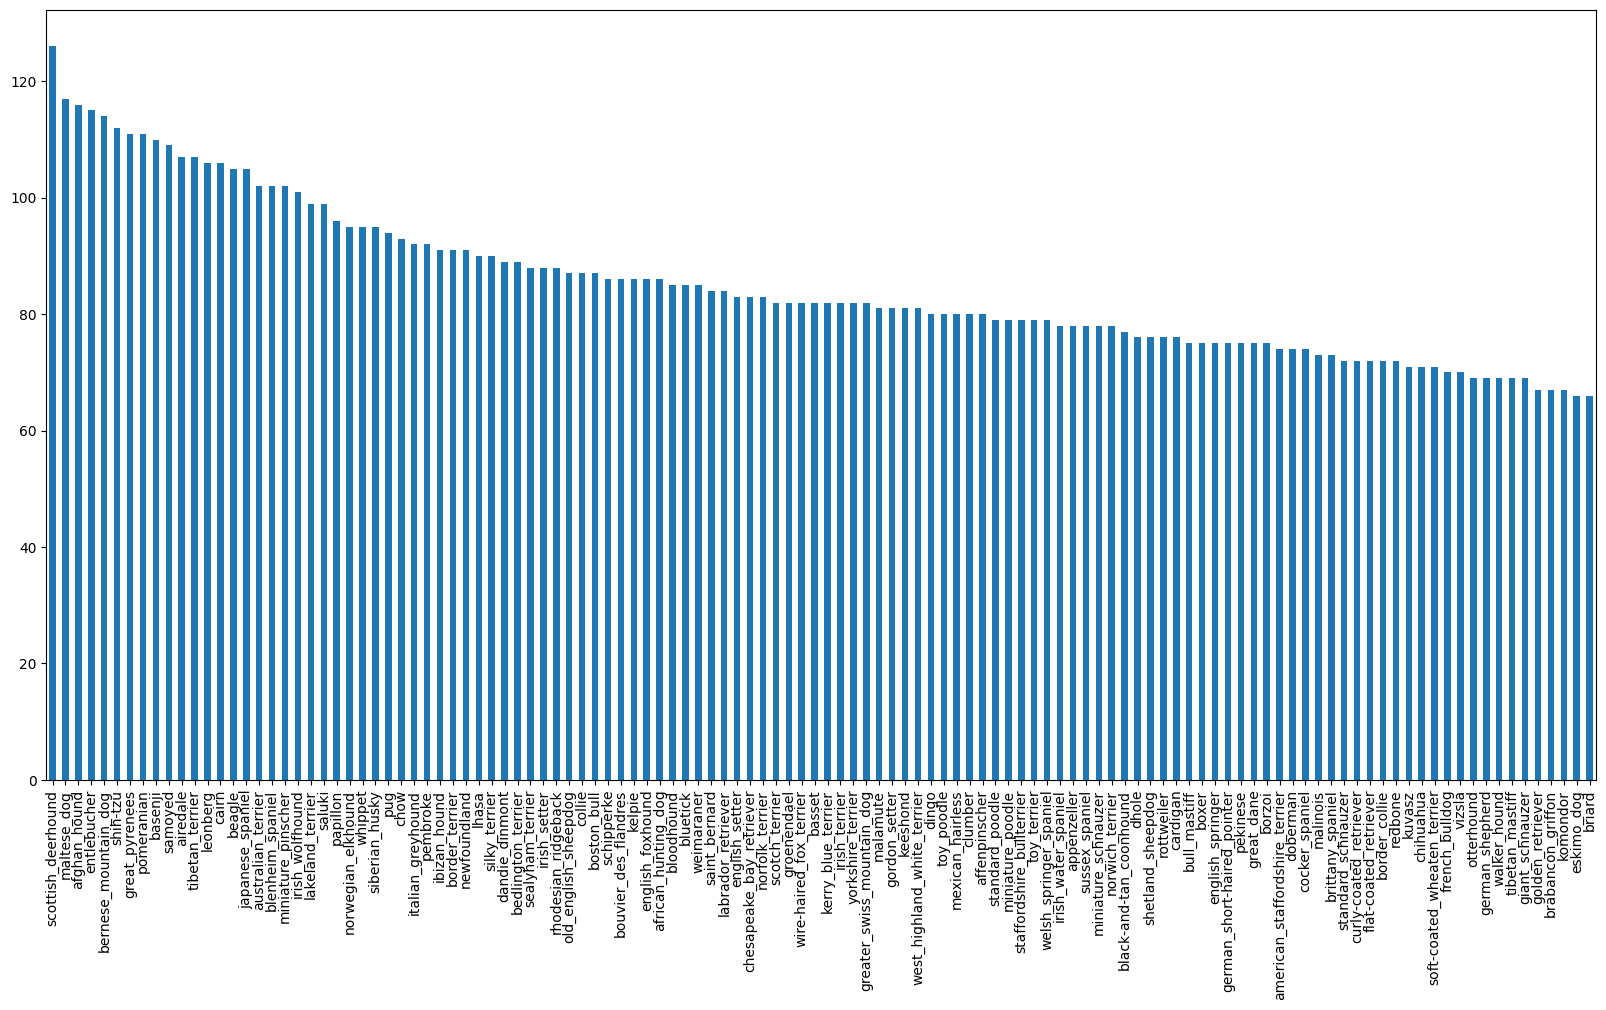

In [ ]:
# How many images are there for each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10))

In [ ]:
# What's the median number of images per class?
labels_csv["breed"].value_counts().median()

82.0

In [ ]:
# Let's view an image
from IPython.display import Image
# Image("drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and their labels

Let's get a list of all of our image file pathnames.

In [ ]:
#make sure all the data math like coulumn id we can compare with kaggle to make it easy instead of check on OG file
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
# after we know there are 120 differnt breed on data.
# Check how many images are there of each breed?

labels_csv["breed"].value_counts()#[:20] to add to see the first 0:20

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

<Axes: >

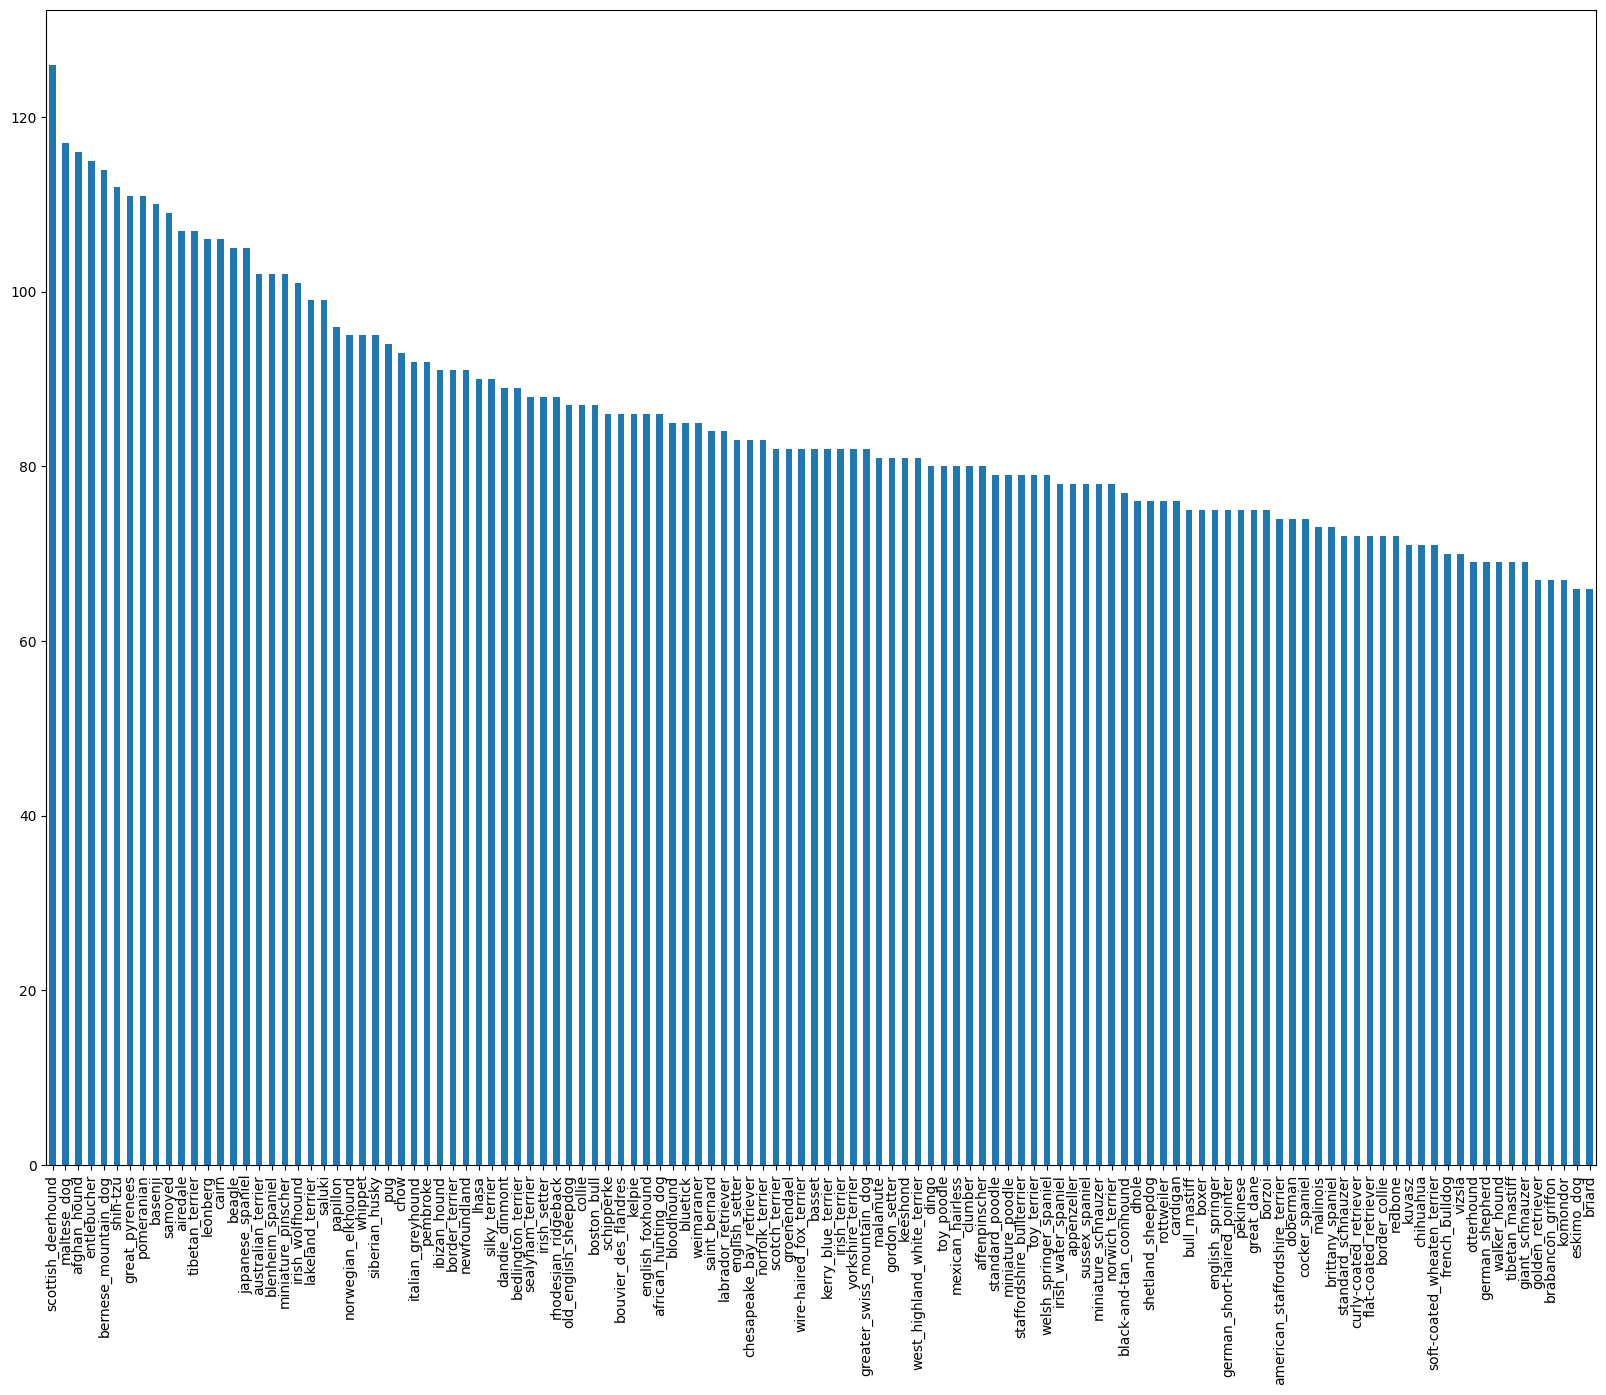

In [ ]:

# visualiz to see
labels_csv["breed"].value_counts().plot.bar(figsize=(20,15))

### Note: Get a medien of coulum so our model donn't train different peforman on each breed. And Gogle recomment 10 images mininum per class.but for best model training process recomment 100 annotation per label


In [ ]:
# Check Median number of imaged per class
labels_csv["breed"].value_counts().median()

82.0

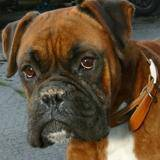

In [ ]:
# View some an image to explore data

from IPython.display import Image
Image("drive/MyDrive/Dog Vision/train/008887054b18ba3c7601792b6a453cc3.jpg")#dog ID.jpg

## Getting images and their labels

## Create list of all of our images file pathnames

In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
# Get a list of our file name so we don't needed to type out code above every single time.

In [ ]:
# Create pathnames from image ID's

# step 1. Create pathnames for image ID's
#filename = [fname for fname in labels_csv["id"]] #create fname(from filename) for fname  in labels_csv  id columns

#step 2 add drive parth infront of filename  drive/MyDrive/Dog vision/train and .jpg(file type)
filenames = ["drive/My Drive/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10
filenames[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
### check the nameber of filename that we just created match with actual image file

import os
len(os.listdir("drive/My Drive/Dog Vision/train"))

10222

In [ ]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/My Drive/Dog Vision/train/")) == len(filenames):
  print("Filenames match actual amount of files!!! Proceed.")
else:
  print("Filenames do no match actual amount of files, check the target directory.")

Filenames match actual amount of files!!! Proceed.


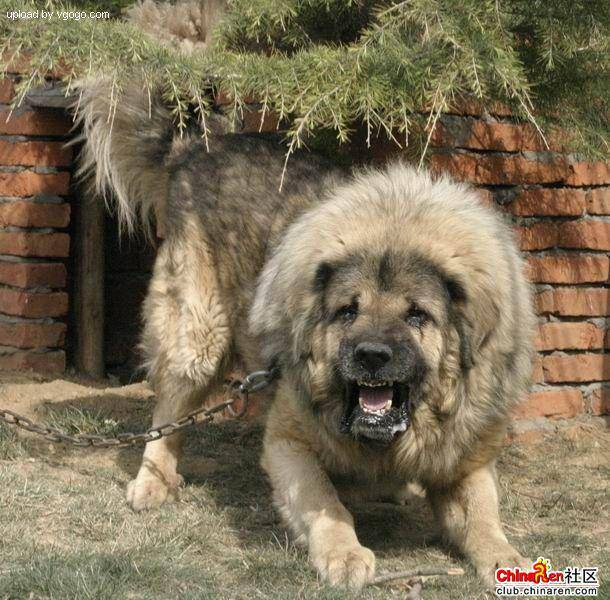

In [ ]:
# One more check
Image(filenames[9000])

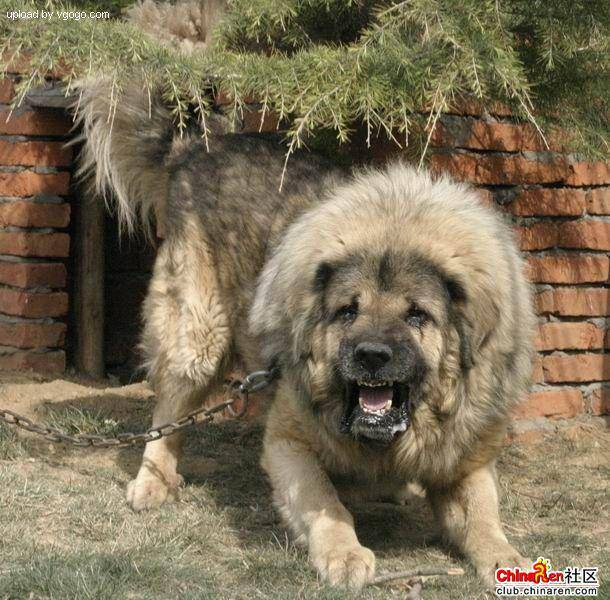

In [ ]:
from PIL import Image

# One more check
Image.open(filenames[9000])

In [ ]:
# check what kind of that dog in index 9000
labels_csv["breed"][9000]

'tibetan_mastiff'

Since we've now got our training image filepaths in a list, let's prepare our labels.

In [ ]:
# Look at labels and create a shorrt name for it
labels = labels_csv["breed"]
labels

0                     boston_bull
1                           dingo
2                        pekinese
3                        bluetick
4                golden_retriever
                   ...           
10217                      borzoi
10218              dandie_dinmont
10219                    airedale
10220          miniature_pinscher
10221    chesapeake_bay_retriever
Name: breed, Length: 10222, dtype: object

In [ ]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
# labels = np.array(labels) # does same thing as above
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

Thi is shour cut of code above:

import numpy as np

labels = labels_csv["breed"].to_numpy()

labels

In [ ]:
len(labels)

10222

In [ ]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories!")

Number of labels matches number of filenames!


In [ ]:
# Find the unique label values by use np.unique()
unique_breeds = np.unique(labels)
unique_breeds # This is should  be 120 breeds of dog if we check in len()

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
#Check unique breed list
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

# Turn label to booleans

In [ ]:
# Turn a single label(dogbreed) into an array of booleans
print(labels[0])#use first labels  for example
labels[0] == unique_breeds#compare first labels with unique_breed list , so that index should be only one true from all


boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
len(labels)

10222

In [ ]:
# Turn every labels(dogbreed) into a boolean array (*PS we turn to boolean because we going to convert boolean in future)
boolean_labels = [label == unique_breeds for label in labels]  #turn all labels into unique_bredds for all labels in labels
boolean_labels[:2] #check index 2

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
# Labels should be 10222 as our original data
len(boolean_labels)

10222

# Turn Boolean array into intergers(number)

In [ ]:
# Example: Turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
filenames[:10]

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

### Creating our own validation set
since the dataset from kaggle doesn't come with a validation set, we are going to create our own.

Anatomy:

* x= standrad vaiable for data.

* y= standrad vaiable for label.

* In deep learning project in colab Hyper parameters use as all Capitals

In [ ]:
# Setup X & y variables
x = filenames
y = boolean_labels

In [ ]:
len(filenames)

10222

Because filenames will always be the input that you are feeding into the model so it will be called X, whereas the boolean labels is the one our model needs to predict and if we were to predict something it will always be y.

## We going to start with experimenting with 1000 images and increase as needed.
*  In deep learning project in colab Hyper parameters use as all Capitals

we reduce data to small portion and try if it work on not first instaed of try to whold daya 10222 which is that going to take to long

We're going to start off experimenting with ~1000 images and increase as needed.

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}
NUM_IMAGES

1000

In [ ]:
# Let's split our data into train and validation sets

# step 1 import sklearn
from sklearn.model_selection import train_test_split

# step 2 split them into traning and validation of total size NUM_IMAGES
x_train, x_val, y_train, y_val = train_test_split(x[:NUM_IMAGES],# mean only take up too 1000 filename
                                                  y[:NUM_IMAGES],#our labels in boolean form
                                                  test_size=0.2,
                                                  random_state=42)#random seed 42

# step 3 check all the length of our data it needed to be correct only
# from 1000 sample it going to be trian data set = 800 , 200 sample in the validation split
len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
# Let's have a geez at the training data and check on data
x_train[:5], y_train[:2]

(['drive/My Drive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/Dog Vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/Dog Vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, Fa


# Prepeocessing Images(Convert,tuning Imahed into Tensors) or convert to number

### Tensor = a numerical representation ,like a metrix: https://www.tensorflow.org/guide/data

* If we working with audio or text file we still need to tuning it into Tensors(convert to number). https://www.tensorflow.org/tutorials/load_data/images
* We preprocess images to number only when we need to. becuase it huge data than just manipulate in filepaths.

## Preprocessing Images (turning images into Tensors)

To preprocess our images into Tensors we're going to write a function which does a few things:
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our image (convert color channel values from from 0-255 to 0-1).
5. Resize the `image` to be a shape of (224, 224)
6. Return the modified `image`

# convert iamge to Numpy array workflow



In [ ]:
#Check shape first
# import matplot.pyplot as image read to see (heigh,width,color channle) 3 color channel= red green blue value range from  0-255
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image.max(), image.min()

(255, 0)

In [ ]:
# see value of color channel on our image
image[:2]

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)

# Turn image to Tensor by using tf.constant()

In [ ]:
# Turn it to Tensor by using tf.constant()
#After get it in Tensorflow it now ready to run on GPU
tf.constant(image)[:2] #Tensor is mililar to numpy array

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

### After see one sample image in tensor .

# We needed create a function to turn all of them in one function:

1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensors
4. Normalize our image (convert color channel values from from 0-255 to 0-1).
5. Resize the `image` to be a shape of (224, 224)
6. Return the modified `image`

More information on loading images in TensorFlow can be seen here: https://www.tensorflow.org/tutorials/load_data/images

# Function 1st workflow for turn all images to tensor

In [ ]:
# Define img size to 244 becuse our ML model that we going to use requie it
IMG_SIZE = 224

# step 1 Create a funtion for preprocessing

def process_image(image_path, img_size = IMG_SIZE): #take img path and img_size define img_size to IMG_SIZE
  """
  Takes an image file path and turns the image into tensor
  """

  # 2 Read in an image file and set to new vaiable
  image = tf.io.read_file(image_path)#It take filename and turn into tensor and put on image variable

  #step 3. Turn jpeg iamge into numerical Tensor with 3 Color Channels(red green blue)
  image = tf.image.decode_jpeg(image,channels=3) # reusing image varible above
  # step 4 convert the colour channels from 0-255(the values of color)to 0-1 in values
  image = tf.image.convert_image_dtype(image, tf.float32) # convert color values to 0-1
  # step 5 Resize the image to our desires value (224,224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])# [heihtsize,widthsize]

  return image


In [ ]:
process_image(filenames[10])

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.41753423, 0.38224012, 0.40184796],
        [0.4316044 , 0.39631027, 0.4159181 ],
        [0.40602714, 0.37879497, 0.3957155 ],
        ...,
        [0.19028023, 0.17067239, 0.18635866],
        [0.28062278, 0.26101494, 0.2767012 ],
        [0.28965282, 0.27004498, 0.28573126]],

       [[0.36733648, 0.33204237, 0.3516502 ],
        [0.3150591 , 0.27976498, 0.29937282],
        [0.29561085, 0.26837867, 0.28529918],
        ...,
        [0.23583163, 0.21230222, 0.22014536],
        [0.2812507 , 0.25772128, 0.2655644 ],
        [0.26320195, 0.23967254, 0.24751568]],

       [[0.40703085, 0.3717367 , 0.3907143 ],
        [0.46396694, 0.42867282, 0.4476504 ],
        [0.5020599 , 0.47482777, 0.491118  ],
        ...,
        [0.27574417, 0.24076518, 0.24374136],
        [0.30945447, 0.27447549, 0.27745166],
        [0.25501153, 0.22003253, 0.22300872]],

       ...,

       [[0.26359692, 0.28712633, 0.24728045],
        [0.26

# Creating our data into batched

recomment size 32 , if we try to process whole data like 10+k img in one.It might not fit into memory. GPU has limited amount memory.

To use TensorFlow effectively,we need our data in form of tensor tupples which like:

`(image, labels)`.

### Turninf data to batched workflow funtion 2nd that take x(image),y(label or dog breed)

In [ ]:
# Create a simple function 2 nd to return a tuple(image,label)

# 1.
def get_image_label(image_path, label): # we paasing path and label in here
  """
  Takes an image file path name and the assosciated label,process the image and returns a typle of
  """

# 2. use a function that we just create above in here
  image = process_image(image_path) # image preprocess function that we just wrote above
  return image, label



In [ ]:
#Demo of above funtion (try only one sample)
#check on function to see tupples x= filenames, y=boolean_labels

#(process_image(x[42]), y[42])
(process_image(x[42]), tf.constant(y[42])) # y still not yet tensor so use tf.constants() infront of y

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

# Create a funtion that turn all data  x and y into batches!

## Funtion 3rd workflow of create Batches  

https://www.udemy.com/course/complete-machine-learning-and-data-science-zero-to-mastery/learn/lecture/17949154#questions

In [ ]:
# Define the batch size, 32 is good size. if we dont't set defuault still 32
BATCH_SIZE = 32

#step 1 create funtion to turn data into batches
def create_data_batches(x, y=None, batch_size= BATCH_SIZE, valid_data=False, test_data=False):
  """
  create batches of datat out of image (x) and labels (y) pairs.
  Shuffles the data if it's traning data but No shuffle if data is validation data.
  Also accepts the data as an input(no labels).
  """
  #Step 2 If the data is a test dataset, we probably don't have labels or no y
  if test_data:
    print("Creating test data batchs.....")
    #tf.data.Dataset = create Tensorflow dataset, from tensor slice x and turn x to tensor
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))#turn all of x into data set. only filepaths no labels
    # step 3 Turn Tensorflow dataset to batche size by" data.map().batche(batch_sise)""
    data_batch =data.map(process_image).batch(BATCH_SIZE)# pass process_image function inside map(because that function only take x data which is image path)and turn it into batch of batch size
    return data_batch


    # Step 3 If the data is valid dataset , we dont need to shuffle it.
  elif valid_data:
    print("Creating validation data batches....")
    # Step3.1 create Tenforfloe dataset same as #2 but take image and label x,y. So we use this with funtion 2
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),#filepaths
                                              tf.constant(y)))#labels
    # Step 3.2 Turn Tensorfloe datat that just created to batch size32 and pass that take x,y that we create as get_image_label
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)# pass funtion get_image_label because valid data have images and label which is x and y
    return data_batch

# step 4 if not of none of above work well if valid data ,and test_Data false.So it going to be traing batch on else
  else:
    print("creating training data batches.....")
    #Step 4.1  Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                              tf.constant(y)))
    # step 4.2 Shuffle pathname and labels before mapping image processor funtion is faster tr_size= 100 mean take first 100 to shuffle. But this case  shuffling images as the same amound of our x
    data = data.shuffle(buffer_size=len(x))# buffe we shuffle all of x

# PS  put shuffle after Process will take longer than shuffle before process that why we put suffle before 4,3 code line
    # step 4.3 Create (image, label) tuplrs (this also turn image path into preprocessed image)
    data = data.map(get_image_label)#pass funtion get_image_label inside( )because training data have images and label


    # Step 4.4 Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
    return data_batch






# Test function by creating training and validation data batch

In [ ]:
#create trainig and validation data_batche by use create+data batches(x_train, y_train), same thing as validation

train_data = create_data_batches(x_train, y_train)
val_data = create_data_batches(x_val, y_val, valid_data=True)# add valid_data=True


creating training data batches.....
Creating validation data batches....


In [ ]:
# check out the different attributes of out data batches
train_data.element_spec, val_data.element_spec #train_data now is in format of data batch

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

 The first one is training data intubple  image mean:

 ((our image(shape=(None = batch is 32 batchsize is none becuase bathc size is flexible
                     , 224heigh ,224wifth, 3channels color), dtype=tf.float32, name=None),
   
tuple label:image label parir in the from of tensor
  TensorSpec(shape=(None, dimension =120 cuz it 120dog breed), dtype=tf.bool, name=None)),

# visualizing our Data Batches

Our data is now in batches,however, but still hard to understand/comprehend. Visualizing will mahe it easy to understand data.

### Function workflow

In [ ]:
import matplotlib.pyplot as plt

# 1. Crate a function for viewing images in a data batch (pass image and label in funtion)
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels from a data batch.
  """
  # 2 Setup the figure
  plt.figure(figsize=(10,10))
  # 3 Create for loop through 25 (for display 25 images)
  for i in range(25):# put range as number that we want to plot
    # Create sunplots (5rows, 5 columns, i+1 mean index +1 in loop)
    ax = plt.subplot(5,5, i+1)
    # 4 Display an image by .imshow()
    plt.imshow(images[i])# i image
    # Add the image labels as the title (this mean our list of unique dog name )
    plt.title(unique_breeds[labels[i].argmax()])#get a unige_breeds label index is the maximum value
    # Tuen the grid lines off'
    plt.axis("off")


In [ ]:
# test what is   plt.title(unique_breeds[labels[i].argmax()])
unique_breeds[y[0].argmax()]

'boston_bull'

# Unbatch data to visualizing
by: Take traine_data from the top off it,unbatch trun into an itertor and return the image and the label
### 1. Use next() turn data to iterator and ,going to grab the first batch off data_train out  of iterator.
### 2. Use data.as_numpy_iterator() to unbatch and turn it into a numpy iterator

## Anatomy:

### `train_data, train_labels = next(train_data.as_numpy_iterator())`

In [ ]:
# Our data is in batch we need to unbatch before visualize.

# stepp 1. turn data to iterator by use next(train_data,) it's going to take batch on the top of data set.
#and unbacth it from a batch and turn it into a numpy iterator by "as_numpy_iterator()"


train_image, train_labels = next(train_data.as_numpy_iterator()) # use this code before display everytime
train_image, train_labels


#instead of dealing with filename now wedealing with process_images with more data

(array([[[[0.31822652, 0.33783436, 0.31430495],
          [0.2564163 , 0.27602413, 0.25249472],
          [0.26596075, 0.2855686 , 0.26203918],
          ...,
          [0.37099105, 0.3396185 , 0.33177537],
          [0.43859798, 0.40722543, 0.3993823 ],
          [0.52287394, 0.49150136, 0.48365822]],
 
         [[0.26897073, 0.28857857, 0.26504916],
          [0.20637292, 0.22598076, 0.20245135],
          [0.19263811, 0.21224597, 0.18871655],
          ...,
          [0.34341708, 0.3120445 , 0.30420136],
          [0.34196103, 0.31058848, 0.30274534],
          [0.40567097, 0.37429842, 0.3664553 ]],
 
         [[0.1965828 , 0.21619064, 0.19266123],
          [0.24009879, 0.25970662, 0.23617722],
          [0.27697602, 0.29658386, 0.27305445],
          ...,
          [0.34990034, 0.3185278 , 0.31068462],
          [0.32438692, 0.29301438, 0.28517124],
          [0.38659304, 0.35522047, 0.34737733]],
 
         ...,
 
         [[0.5541959 , 0.56988215, 0.616941  ],
          [0.45146

In [ ]:
# this is how data batch in data_train so use this to compare with unbathc code
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
#check on the batch size it should be the same 32
train_image, train_labels = next(train_data.as_numpy_iterator())
len(train_image), len(train_labels)

(32, 32)

#Now visualize the data in a training batch

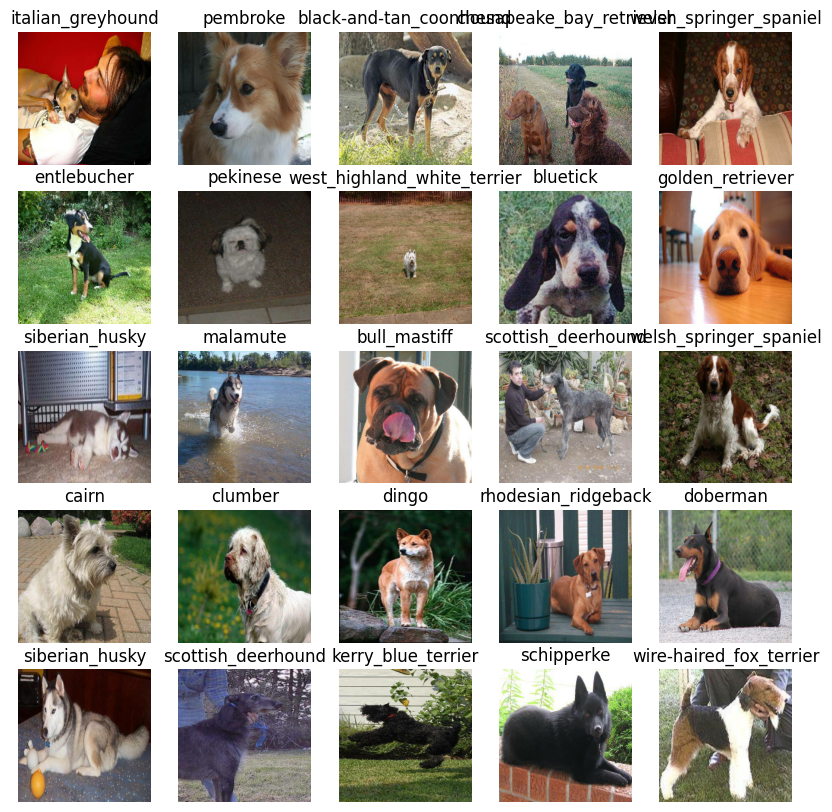

In [ ]:
train_image, train_labels = next(train_data.as_numpy_iterator())  # this line normorlly togetter
show_25_images(train_image, train_labels)

# Visualize on Validation set batch

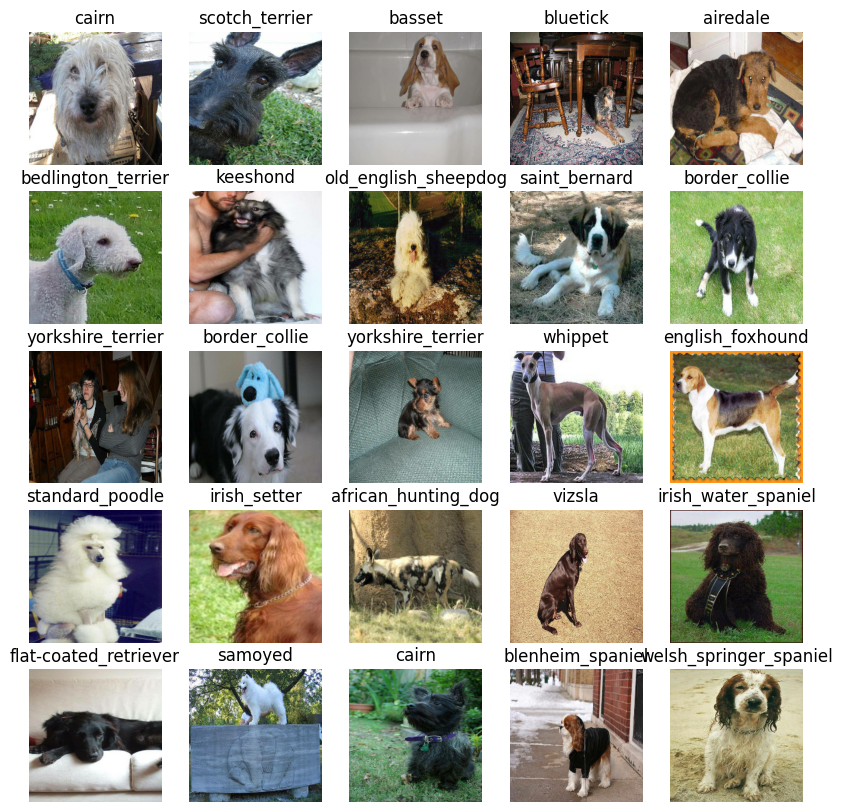

In [ ]:
# Alway unbatch before call to see it on visulize

val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

# Creating and training model (From model that alredy exist)

Build from what an existiing model has alredy learn and apply to our promblem. This way save money, and save time.After we find a baseline result we can improve it from there

## before buliding model, needs a few thing to define:

* The input shape(our images shape,in the form of Tensors) to our model
* The output shape(image labels, in the form of tensors) of our model.
* The URL of the model we need to use on our project select module
  * https://tfhub.dev/  in Architecture the higher the number, the better the model But it also the tradeoff there is, the higher the number, the longer it takes to to train.
  * https://pytorch.org/
  * https://paperswithcode.com/

  
For this project we use the mode from Tensorflow https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [ ]:

# Set up input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch ,height,wifth,color channel3


# Set up output shape of our model (how many differnt labels)
OUTPUT_SHAPE = len(unique_breeds)# we know that 120 but put it as code is better


# Set up model URL from Tensors Hub(the resuable , machine learning moodules) copy URL and put in str
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

We use mobilenet_v2_130_244/classification:

becausw: MobileNet V2 is a family of neural network architectures for efficient on-device image classification and related tasks, originally published by

# Put inout output url model together into Keras deep learning model
 After we get this 3 thing above we need to put it togeter by use the TensorFlow2.0 keras 's API', which is additional to TenFlow 2.0 https://www.tensorflow.org/guide/keras


 ## Create a funtion with these step:
 * Takes input shape,output shape and the model we are chosen as parameters
 * Define the layers in a Keyers Keres model in seqential fasion(do this first,then this, then that)
 * Compiles the mmodel(say it shoud be evaluated and improved)
  - losses() funtion help measument model ,lower loss better model than higher loss. this is how we choose loss funtion https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
  - optimizer.Adam()
 * Build the model(tells the model the input shape it'll be gettung) thie step in  Usage here https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
 * Return the model.

 All of these steps can be found here https://www.tensorflow.org/guide/keras .





# Function of how to Builing any case of Deep learning model*

In [ ]:
# Create a funtion which build a Keras model()

# 1. pass all all our variable for input,output, model_url
def create_model (input_shape= INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url= MODEL_URL):
  print("Build model with:",MODEL_URL)# print model name or url. mobulenet_v2 has 2 layers

  # 2 Setup the model layers( We use sequential) and intantiating a model to vaible "model"
  # 2.1  Set up keras.Sequentail() model
  model = tf.keras.Sequential([
        # 2.2 pass hub.KerasLayer(our model that we use)
      hub.KerasLayer(MODEL_URL),#Layer 1 (input layer) use model url
      #2.3 we want our output to in shape of howmany labels we have.And use Activation softmax to convert thoese pattern into number between 0and 1.
        #[info ]if  Binary classification activation ="sigmoid" in our case er Multi-class classification activation ="softmax"
      tf.keras.layers.Dense(units= OUTPUT_SHAPE, activation="softmax") #LAYER 2 (output layer) pass output shape in unit
  ])

  #3 compile or (combine the model,define it how model going to learn) loss = lower is better
  model.compile(
      # 3.1 use losses() function to measurment how well our model guessing a lower is better forr loss() funtion
      loss = tf.keras.losses.CategoricalCrossentropy(), # chossing losses funtion depend on what promblem.ex binary classification losses.BinaryCrossentropy

      # 3.2 use optimizers.Adam() help model improve its guesses
      optimizer = tf.keras.optimizers.Adam(),

      # 3.3 use matrics to predict how well our model perform
      metrics = ["accuracy"]# in our case how well our model is predicting the correct image label
  )

  #4. Build the model by use model.build(input)
  model.build(INPUT_SHAPE) # this input shape we are going to put on model and build model with (224,224,3)


  return model




In [ ]:
# See the summary

model = create_model()#show and display what model we use
model.summary()

Build model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


5432713 pattern that mobilenet v2 has found with them image before and than we utilize them and train our own 120,000 parameters

# TensorBoard Callback

Callbacks are helper funtion a model can use during training to do such things as save ,check progress or stop training early if a model stops improving.


To setup callback,we need to do 3 things: for help us monitor model performanc:
1. Load the TensorBoad notebook extension
2. Create TensorBoard callback which is able to save logs to a directory and pass it to our model's `fit()` funtion.
3. Visualize our model trining logs with the %tensorboard~ magig funtion(we will do this after model training)

In [ ]:
# 1 Load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
# import datetime because we want to track each experiment by time that we run it.
import datetime

# 1. Create a funtion to build a TensorBoard callback
def create_tensorboard_callback():
  # 2. Ceate a logdir(directory)foe storing TensorBoard logs. by create new folder on  our project as logs
  logdir = os.path.join("drive/MyDrive/Dog Vision/logs",
                        #create time that logs can get tracked whenver we runr an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  #3. pass logdir into to sace
  return tf.keras.callbacks.TensorBoard(logdir)





# Early stoppping Callback

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [ ]:
#Create early stopping callback:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy" ,
                                                 patience=3) # monitor defualt is val_loss


# Training a model (on subset of data)

Our first model is only train on 1000 images, to make sure everyrhing is working

epochs = how many time is our model allowed to look at the training data before it stop.

In [ ]:
# step 1 Define epochs first, epochs 100 = # we give model 100 chanes to go through the training data set and find out the patterns

NUM_EPOCHS = 100 #@param{type:"slider",min:10, max:100 ,step:10}

In [ ]:
# step 2 checking GPU make sure we still runing on it by tf.config.list_logical_devices("GPU")

print("GPU"," are using" if tf.config.list_logical_devices("GPU") else "not available")



GPU not available


# Create a function to train a model.

* Create a model using `create_model()`
* Setup a TensorBoard callback using `create_tensorboard_callback()`
* Call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for (`NUM_EPOCHS`) and the callbacks funtion we would like to use.
* Retrun the model

Create and train a new model instance.

`model = create_model()`

`model.fit(train_images, train_labels, epochs=5)`

In [ ]:
from keras.src import Model
def train_model():
  """
  Train a given model and retruns the trained version.
  """
  # Create a model
  Model = create_model()

  # Create new TensorBoard session everytime we train a model

  tensorboard = create_tensorboard_callback() # this is from our funtion that we create so every time

  #Fit the function
  model.fit(x = train_data, # data batch
            epochs = NUM_EPOCHS,  # how many chances did model have to pass over the entire training data to find pattern
            validation_data = val_data,# batch data (we did batch data in funition before)
            validation_freq = 1, # how ofter we want to test the patterns that our model has found on vilidation set.we set to 1 becasue we want to test it pattern for every epoch
            callbacks = [tensorboard ,early_stopping]) #pass tensorboard above and earlystopping


  #Return the fitted model
  return model

In [ ]:

# Fit the model to the data
model = train_model() #when training model for first time the first epochs model take longer than the rest cus its loading data into memory of GPU

Build model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 119s 4s/step - loss: 4.6089 - accuracy: 0.0962 - val_loss: 3.5208 - val_accuracy: 0.2250
Epoch 2/100
25/25 [==============================] - 95s 4s/step - loss: 1.6858 - accuracy: 0.6538 - val_loss: 2.2328 - val_accuracy: 0.4400
Epoch 3/100
25/25 [==============================] - 87s 4s/step - loss: 0.5883 - accuracy: 0.9262 - val_loss: 1.7301 - val_accuracy: 0.5800
Epoch 4/100
25/25 [==============================] - 99s 4s/step - loss: 0.2598 - accuracy: 0.9850 - val_loss: 1.5220 - val_accuracy: 0.6500
Epoch 5/100
25/25 [==============================] - 68s 3s/step - loss: 0.1514 - accuracy: 0.9975 - val_loss: 1.4389 - val_accuracy: 0.6600
Epoch 6/100
25/25 [==============================] - 79s 3s/step - loss: 0.1018 - accuracy: 1.0000 - val_loss: 1.3959 - val_accuracy: 0.6500
Epoch 7/100
25/25 [==============================] - 61s 2s/ste

**Training** summary: we start sample data with 1000 than split to validation data 0.2%(200) ,  traing_data = 800 / 32(batch size) = 25step

- so it train for 25 step (800/2) , validation (200/32) for 7 steps.
- our goal is minimize the loss from loss funtion
- if this traing work well loss: should go down and accuracy: shlod go up
- our model working but is over fitting because it training better on train_data than val_data
- if we see once the number of validation accuracy stop improving for a number of epoch becuse. its because of out function that we create to stop callback.So epochs was stop at 16 epoch in this case.

## Checking the TensorBoard logs *** Still didn't work

  - we ever we train a new model itsgoing to automaticlly log its performance

The TensorBoards magic funtion (`%tensorboard`) will access the logs directory we created earlier and visualized its contens.

In [ ]:
# use magic fucntion and pass it the tag to our log directory
#%load_ext tensorboard

# for the space we use \
%tensorboard --logdir drive/MyDrive/Dog\Vision/logs --port = 6006

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2023-10-26 18:04:25.690570: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-26 18:04:25.690743: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-26 18:04:25.690828: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-26 18:04:27.189591: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC] [--host ADDR]
                   [--bind_all] [--port PORT] [--reuse_port BOOL] [--loa

In [ ]:
import tensorflow as tf
import datetime, os

### the visualize tool still didn't work

In [ ]:
#!rm -rf ~/.tensorboard-info/*


In [ ]:
#!pip install --upgrade tensorboard


In [ ]:
#!pip install tensorboard==2.13.0


In [ ]:
### tensorboard suppose to display grapth


### tensorboard vusualize analyst

its will show the date that we run experimance on eact train set validatio. We can adjust and read the data.:

1.   we try to minimize loss and get more score on accuracy
2.   we want out epoch to go as we set epoch to 100 this time but it stop at25.
3.   in the grapht show the training data set going up way further almoas 2:1 compare to the validation dat. This is mean our ML model is overfitting cus learning peratern intraining data far too well.
4. to fix this we need to use more data








# Making  and Evaluating predictions using a trained model.


Anatomy : model.predict (val_data, verbose=1) we val_data

Before we scale up and train on more data, let's see some other ways we can evaluate our model. Because although accuracy is a pretty good indicator of how our model is doing, it would be even better if we could could see it in action.

Making predictions with a trained model is as calling `predict()` on it and passing it data in the same format the model was trained on.

In [ ]:
# Making predictions on the validation data (not used to train on )

predictions = model.predict(val_data, verbose=1) # verbose use to see progress
predictions

# This is will show 200 array with 120 diferrent number. Becuase shape of predictions(200 y_val ,120 unique_breeds)

In [ ]:
#check shape.
# This is will show 200 array with 120 diferrent number. Becuase shape of predictions(200 y_val ,120 unique_breeds)

predictions.shape

In [ ]:
len(y_val) , len(unique_breeds)

### Max value in array of predictions is correspond to the index of the label that model think

In our project we use softmax in our model so it will return prediction probability between 0-1. and it going to be a lot of decimo as how computer work

In [ ]:
# Predictions single array of index 0. #first pic in val_data that we split fromm 1000 to 200

predictions[0] #**Max value in here is correspond to the index of the label that model think

In [ ]:
# Because we use softmax will make prediction to totla or probility will give result between 0-1
np.sum(predictions[0])

In [ ]:
np.sum(predictions[0])

Note:  our soft max layer is doing is taking  output this array of numbers and changing it into an array of numbers like this of length 120 using a soft max activation.

Making predictions with our model returns an array with a different value for each label.

In this case, making predictions on the validation data (200 images) returns an array (predictions) of arrays, each containing 120 different values (one for each unique dog breed).

These different values are the probabilities or the likelihood the model has predicted a certain image being a certain breed of dog. The higher the value, the more likely the model thinks a given image is a specific breed of dog.

Let's see how we'd convert an array of probabilities into an actual label.

In [ ]:
# Frist prediction . set variable index = .... so we can try more index
#index = 0
print(predictions[0])
print(f"max  value (probability of prediction):{np.max(predictions[0])}") # find prediction (probability) value inside array
print(f"sum : {np.sum(predictions[0])}")#find sum in probability of the index that we spacific
print(f"max index : {np.argmax(predictions[0])}") #find the index position of that max value
print(f"Predicted label: {unique_breeds[np.argmax(predictions[0])]}")# หาlabel after find argmax index than we find where is occurs in(label) unique_breed

# np.argmax ตำแหน่งที่มีค่าสูงสุดคือ np.argmax และต่ำสุดคือ np.argmin


### First prediction meaning

print(predictions[0])

`np.max(predictions[0])` = the max probability value predicted by the model

`np.sum(predictions[0])` = because we used softmax activation in our model, this will be close to 1

`np.argmax(predictions[0])` = the index of where the max value in predictions[0] occurs

`unique_breeds[np.argmax(predictions[0])]` = the predicted label

Having this information is great but it would be even better if we could compare a prediction to its true label and original image.

To help us, let's first build a little function to convert prediction probabilities into predicted labels.

Note: Prediction probabilities are also known as confidence levels.

In [ ]:
unique_breeds

## Turn Code First prediction above to do it at scale. It's better to see the image prediction is being made on.

 # Function to convert prediction probabilities into predicted labels.

Note: Prediction probabilities are also know as confidence levels


In [ ]:
# Turn (first)prediction probabilities into their labal (easier to understand)

# step 1 create name of our funtion, (the input that we want to put in funtion)
def get_pred_label(prediction_probabilities): #prediction_probabilities = predictions
  """
  Turns an array of prediction probabilities into a label.

   """
# step 2 return (what do we want funtion to calculate).Take this "unique_breeds[np.argmax(predictions)] ""
  return unique_breeds[np.argmax(prediction_probabilities)]

# step 3 get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[0]) # call function that we created and put the input that we need it to find
pred_label





 # Function to prediction Validation images and  validation labels(truth labels)


Remember, the model hasn't trained on the validation data, during the fit() function, it only used the validation data to evaluate itself. So we can use the validation images to visually compare our models predictions with the validation labels.

Now since our validation data is still a batch dataset, we will have to unbatchify it to make prediction on the Validation images. And than compare those predictions to the validation labels(truth labels).


 Since our validation data (val_data) is in batch form, to get a list of validation images and labels, we'll have to unbatch it using `unbatch()` and then turn it into an iterator using `as_numpy_iterator()`.

In [ ]:
val_data

# From vdo 246

# Create a function to unbatch a batched from VDO 246 *
def unbatchify(data): #create funtion name and()
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = [] #because we create funtion we can use any variable name we want
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator(): # unbatch and turn it to iterator
    images.append(image)
    labels.append(label)
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)# pass our val_data
val_images[0], val_labels[0] #chech on val img0 , val label0

In [ ]:
get_pred_label(val_labels[0])

# From end-to-end

In [ ]:
# Create a function to unbatch a batched dataset end-to-end * This one doesn't show label array as in VDO

#sometime output fot [0] get differnt dog name? it should be cairn
def unbatchify(data): #create funtion name and()
  """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
  images = [] #because we create funtion we can use any variable name we want
  labels = []
  # Loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():# unbatch and turn it to iterator
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)]) # convert true label into actual label
  return images, labels

# Unbatchify the validation data
val_images, val_labels = unbatchify(val_data)# pass our val_data
val_images[0], val_labels[0] #chech on val img0 , val label0

In [ ]:
get_pred_label(val_labels[0])

### Now we have hot ways to get (funtion that we create to get prediction):

1. Probabilities predictied
2. Validation labels (True labels)
3. Validation image

Create funtunction to make these all predicted funtion to more visualize.


We'll create a funtion which these:
* 1. Takes an array of prediction probabilities, an array of truth lables and an array of images and intergers.
* 2. convert the  prediction probabilities to a predicted label.👍
* 3. Plot the predicted label, probabilities, the teuth label and the target image on a single plot.👍

In [ ]:
# Function to to put all 3 to visualized

#step 1 create name and spacifix which 3 funtions that we  going to pass in this funtion
def plot_pred(prediction_probabilities, labels, images, n=1):# n = index sample. this is mean index 1
    """
    View the precistion , ground truth and image for sample n
    """
    # create easy vaible to use to save our time of typing, we can assing more than one at the same time
    pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n] #เอาชิื่อแต่อันของฟังชั่นมา created ให้สั้นลงเวลาเรียกใข้งาน


    #step 2 Get the pred label(Function to convert prediction probabilities into predicted labels)ย้อนดูที่ฟังชั่นนี้ว่าให้ input อะไร
    pred_label = get_pred_label(pred_prob)


    #step 3 plot image & remove ticks
    plt.imshow(image)#we just want seare img we dont want axes. this is matplolib pass numpy array,if img will display 2D
    plt.xticks([]) # make it emty
    plt.yticks([])

    #  Caage the colour of title prediction if right = Green if wrong = Red

    if pred_label == true_label:
      color = "green"
    else:
      color = "red"

    # step 4 change plot title(ผลresult ที่จะขึ้นโชว์) to be prdicted(pred_label), probabilities of prediction(pred_prob), and truth label(labels).
    # 4.1 use pred_label ,pred_prob, ture label(labels)
    # 4.2 make it 2 decimo 0.00 by {:2.0f}% reducing amount of decimal points for pred_prob position medle
    plt.title("{} {:2.0f}% {}".format(pred_label,
                              np.max(pred_prob)*100,#prediction probability value ,the max of it time 100, 2 decimal for it
                              true_label),
                              color = color) #add color over here


In [ ]:
# Test function plot_pred()
# Now call the funtion to test เอามาเทียบกัน

plot_pred(prediction_probabilities = predictions,# prediction อันแรกที่ทำก่อนconvert to Function to convert prediction probabilities into predicted labels.
          labels = val_labels, # take val_label from funtion prediction Validation images and validation labels
          images= val_images,# take val_label from "funtion prediction Validation images and validation labels "
          n=115) # n = index of sample that we want to predict


Now we got onr function to visualize our models top prediction,Let's make another to view our models top 10 prediction


This funtion will:
* Take an input of prediction probabilities array and a ground truth(labels) array and an integar.
* Find the prediction using `get_pred_label()` * same as convert to pred_label
* Find the top 10:
  * Prediction probabilities indexes
  * prediction probabilities values
  * Prediction labels
* Plot the top 10 prediction probabilities values and labels, coloring the true label green


# Function to view models top 10 prediction


In [ ]:
# argsort() it giving us the order of indexes that will sort the array of predictions[0]
predictions[0].argsort()

In [ ]:
# Top 10 of indexes prediction [0]
# if we want top 10 use -10 it will show the indexes of top 10
# we can use revise by [::-1]
predictions[0].argsort()[-10:][::-1]

In [ ]:
# Anatomy See the top 10  values of  of predictions 0
predictions[0][predictions[0].argsort()[-10:][::-1]]

In [ ]:
predictions[0].max()

In [ ]:
# find top 10 prediction label
unique_breeds[predictions[0].argsort()[-10:][::-1]]

In [ ]:
# function sturcture

def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest predictions confidence along with the label for sample n
  """
  # make easy varaible that we spacific to pass in function to another short or easy to use
  pred_prob, true_label = prediction_probabilities[n], labels[n]


  # Get the pred label(Function to convert prediction probabilities into predicted labels) take it here
  pred_label = get_pred_label(pred_prob)  #from this funtion = get_pred_label(prediction_probabilities)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]

  #Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]  # pred_prob+ pred_prob.argsort()[-10:][::-1]

  #Find the top 10 prediction label
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  #Setup plot
  # x = np.arange(len(top_10_pred_label) because we want x values of bar to be prediction label
  #y = the prediction probabilities for each samples
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), # x = np.arange(len(top_10_pred_label)
                     top_10_pred_values, # y
                     color = "grey") #color it

  # We want x trick to be a name of predicton_label. ชื่อบนกราฟx and we want it 10 bar
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels = top_10_pred_labels,
             rotation = "vertical")

  #Change the color of ture label np.isin() = if sometinng is in something
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass



In [ ]:
#Test funtion plot_pred_conf()
plot_pred_conf(prediction_probabilities = predictions, # use prediction อันแรกที่ทำก่อนconvert to "Function to convert prediction probabilities into predicted labels".
               labels = val_labels,# take val_label from "funtion prediction Validation images and validation labels to compare"
               n=115)#test on picture sample index 19



In [ ]:
# check out a few predictions and their different values (This is train on 1000 iamges )

i_multiplier = 15  # adjust to multiplier n,
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))

# create for loo
for i in range(num_images):
  # set subplot 1
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  # instantiate plot_pred() funtion
  plot_pred(prediction_probabilities=predictions,# use prediction อันแรกที่ทำก่อนconvert to "Function to convert prediction probabilities into predicted labels".
            labels = val_labels, #take val_label from funtion prediction Validation images and validation labels
            images = val_images,#take val_label from funtion prediction Validation images and validation labels
            n=i+i_multiplier)
  #Set subplot2
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  # instantiate plot_pred_conf()function
  plot_pred_conf(prediction_probabilities = predictions,
                 labels = val_labels,
                 n=i+i_multiplier)
# Help with the plot layout to not cut out any thing
plt.tight_layout(h_pad=1.0)

#Show plot
plt.show()



# Create a confusion matrix with our model predictions and true labels?

@tf_export('math.confusion_matrix', v1=[])
@dispatch.add_dispatch_support
def confusion_matrix(labels,
                     predictions,
                     num_classes=None,
                     weights=None,
                     dtype=dtypes.int32,
                     name=None):
  
tf.math.confusion_matrix(
    labels,
    predictions,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)
                    

#Saving and Reloading a trained model

ps.create a new folder to save your model and than `my_model.save('my_model.h5')`

https://www.tensorflow.org/tutorials/keras/save_and_load


In [ ]:
# Create a function to save a model

def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix(string).
  """

  #Create a model directory pathname with current time same as log we want to know how many img was train on.
  #Save a model with current time so we can track pur experimance instead of just save as normal

  modeldir = os.path.join("drive/MyDrive/Dog Vision/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  #create nmodel path. combine modeldir with suffix
  model_path = modeldir + "-" + suffix + ".h5" #.h5 is format of savinf model
  print(f"Saving model to:{model_path}") # reminding


  #Save model with model.save()
  model.save(model_path)

  # Retuen model path because we want to see and use that later
  return model_path



# Load our train model

Recreate the exact same model, including its weights and the optimizer:

`new_model = tf.keras.models.load_model('my_model.h5')`

Show the model architecture

`new_model.summary()`

In [ ]:
#Create a funtion to load a trained model
def load_model(model_path):
  """
  Load a saved model from a specificed path
  """
  print(f"Loading saved model from: {model_path}") #just reminding

  #Load model .models.load_model(filepath,custom_objects) because we use hub.KerasLayer(our model on this project) we need to verify custom-object
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})

  return model


## After we got funtion to saved and load a trained model, needed to mke sure it work!

#Save and Load without function

In [ ]:
# Save our model trained on 1000 images

save_model(model, suffix="1000-images-mobilenetv2-Adam") # spacifix to let co-worker to know which model is which

#Load a trained model

`new_model = tf.keras.models.load_model('filepath/model_name')`

Check its architecture:

`new_model.summary()`

In [ ]:
#Loada trained model
loaded_1000_image_model = load_model("drive/MyDrive/Dog Vision/models/20231025-230057-1000-images-mobilenetv2-Adam.h5")

## Check id it saved properly

by use `.evaluate(dataset)`  but this model we use val_data with 1000 sample

In [ ]:
# Evaluate the pre-saved model(before saving it)
# we can check if our model that we save work well by pass val_data to model.evaluate()
model.evaluate(val_data)

7/7 [==============================] - 15s 2s/step - loss: 1.2804 - accuracy: 0.6650


[1.2803529500961304, 0.6650000214576721]

In [ ]:
# Evaluate the loaded model(after saved) its should return the same number with before save
loaded_1000_image_model.evaluate(val_data)


7/7 [==============================] - 13s 2s/step - loss: 1.3110 - accuracy: 0.6700


[1.3110132217407227, 0.6700000166893005]

# Trainng model on full data

In [ ]:
# check file name in x and labels in y
len(x),len(y)

(10222, 10222)

In [ ]:
x[:5] # check first 5 filename

['drive/My Drive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [ ]:
# We split x_train before at 800, so our at the moment model has only trained on 800
len(x_train)

800

# LOOK on process to train Full model

* we already have function to create data batch so we just pick model to suit problem
* we alredy have model Tensorflow hub so we can just create model than fit the model to the data and make prediction.

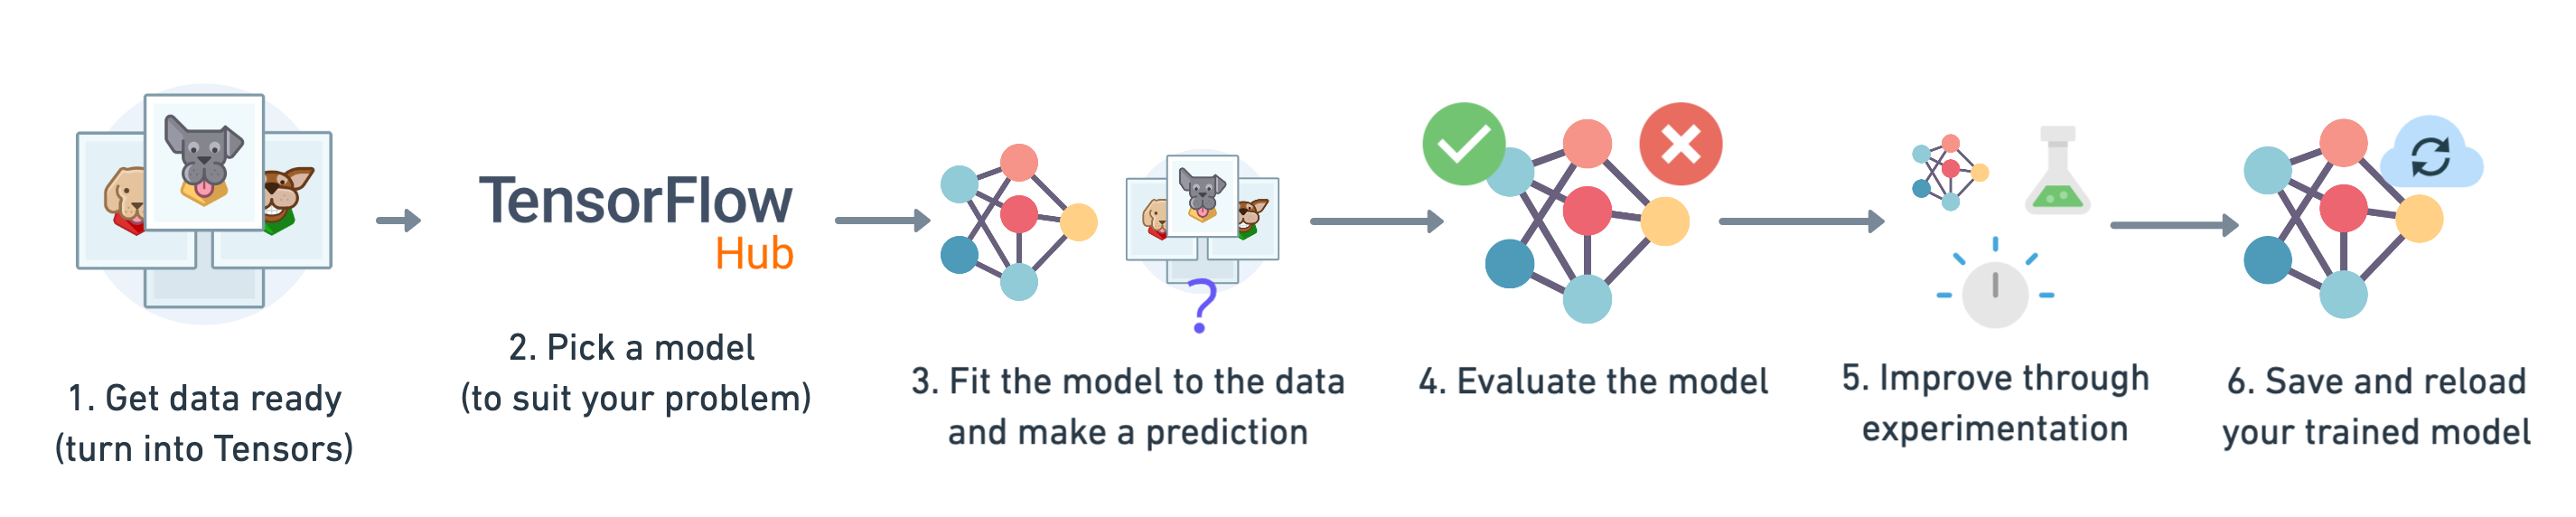

# 1. Gey data ready

In [ ]:
# Create a data batch with full data set.
full_data = create_data_batches(x,y)#this is where our function for create data batched helpful


creating training data batches.....


In [ ]:
# check o full  data. if it turn to BatchData
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

# 2. Pick model

In [ ]:
#Create model for full model (this is where we use our funtion can be use in here :
# Function of how to Builing any case of Deep learning model


full_model = create_model()

Build model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
#create full model callback. Use callback funtion here. that help us track performant of our model and compare to other
full_model_tensorboard = create_tensorboard_callback()

#No validation set when training on all the data, so we can't moniter validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy", # we train with full data we need to change to accuracy
                                                             patience=3)# help for overfitting

# 3. Fit the model to data

* fiting model will take a very long time because GPU using in the runtime has to load all of the img into memory.

In [ ]:
# fit the full model to full data (train set)

full_model.fit(x= full_data, #full data
               epochs = 100,# or NUM_EPOCHS cuz it was set to 100
               callbacks=[full_model_tensorboard, full_model_early_stopping])# the two callback that just created





Epoch 1/100
320/320 [==============================] - 615s 2s/step - loss: 1.3436 - accuracy: 0.6684
Epoch 2/100
320/320 [==============================] - 607s 2s/step - loss: 0.3960 - accuracy: 0.8856
Epoch 3/100
320/320 [==============================] - 599s 2s/step - loss: 0.2374 - accuracy: 0.9348
Epoch 4/100
320/320 [==============================] - 606s 2s/step - loss: 0.1523 - accuracy: 0.9651
Epoch 5/100
320/320 [==============================] - 596s 2s/step - loss: 0.1070 - accuracy: 0.9786
Epoch 6/100
320/320 [==============================] - 605s 2s/step - loss: 0.0779 - accuracy: 0.9880
Epoch 7/100
320/320 [==============================] - 592s 2s/step - loss: 0.0595 - accuracy: 0.9905
Epoch 8/100
320/320 [==============================] - 605s 2s/step - loss: 0.0459 - accuracy: 0.9942
Epoch 9/100
320/320 [==============================] - 588s 2s/step - loss: 0.0371 - accuracy: 0.9964
Epoch 10/100
320/320 [==============================] - 582s 2s/step - loss: 0.031

In [ ]:
# As the fit model is running , should save model running after it.
#In case model stopping by earlt stoppping call back.
#Its going to automatically call our save model funtion and save full model to our model directly

save_model(full_model,suffix="full-image-set-mobilenetv2-Adam")

Saving model to:drive/MyDrive/Dog Vision/models/20231026-205304-full-image-set-mobilenetv2-Adam.h5


'drive/MyDrive/Dog Vision/models/20231026-205304-full-image-set-mobilenetv2-Adam.h5'

In [ ]:
#Load full model
loaded_full_model = load_model("drive/MyDrive/Dog Vision/models/20231026-003758-full-image-set-mobilenetv2-Adam.h5")

Loading saved model from: drive/MyDrive/Dog Vision/models/20231026-003758-full-image-set-mobilenetv2-Adam.h5


# Making preeiction on the test dataset


Whatever data we working with text audio images or Video nedded to convert into number

Since model in this project has been trained on img in thr form of Tensor batches, to make predictions on the test data,we 'll have to get it into the same format.

I created `create_data_batches()` earlier which can take a list of filenames as input and cover them into Tensor batches.

Step to make prediction on the test data:
  * Get the test image filenames
  * convert the filenames into test data batches using `create_data_batches()` and setting `test_data` parameter to `True` (since the test data doesn't have labels)
  * Make a predictions array by passing the test batches to the `predict()` method called on our model

## Get the test image filenames

In [ ]:
# Load test image filename

# 1. assigned filepath
test_path = "drive/MyDrive/Dog Vision/test"
# 2. create filename [filepath+fname for fname in oc.listdir(filepath)]
test_filenames = [test_path + fname for fname in os.listdir(test_path)]# alway use os.listdir(filename) to
test_filenames[:10]


## Convert the filenames into test data batches using create_data_batches() and setting test_data parameter to True (since the test data doesn't have labels)

In [ ]:
#Check len
len(test_filenames)

In [ ]:
# Create test data batched ** use the function that we create

test_data = create_data_batches(test_filenames, test_data=True) # pass test filename that we just create.